# Import libs

In [1]:
import sys, os
if not sys.path[0] == os.path.abspath('..'):
    sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
from models.knn.knn import knn
from models.dmc.dmc import dmc
from models.naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Breast Cancer dataset

In [2]:
Xy = pd.read_csv('../datasets/breast_cancer.csv')
Xy.dropna(inplace=True)
X = Xy.drop(['diagnosis', 'id'], axis=1)
y = Xy['diagnosis']

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
nb_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
nb_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
nb_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    nb_model = naive_bayes_classifier()
    nb_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    nb_hit_rate_list.append(nb_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    nb_y_pred = [nb_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    nb_confusion_matrix_list.append(confusion_matrix(y_test, nb_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
nb_std_dev = np.std(nb_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.9473684210526315, 0.9122807017543859, 0.9473684210526315, 0.9035087719298246, 0.9298245614035088, 0.9035087719298246, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9035087719298246, 0.8947368421052632, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.8771929824561403, 0.9035087719298246, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9035087719298246]

Accuracy:
0.9171052631578949

Standard Deviation:
0.018499207639441347

Confusion Matrix:
    M   B
M  40   1
B   5  68
    B   M
B  74   5
M   5  30
    M   B
M  45   4
B   2  63
    B   M
B  68   1
M  10  35
    B   M
B  66   5
M   3  40
    M   B
M  40   8
B   3  63
    M   B
M  41   4
B   3  66
    B   M
B  68   4
M   5  37
    B   M
B  77   2
M   5  30
    M   B
M  37   9
B   2  66
    M   B
M  40   9
B   3  62
    B   M
B  67   3
M   7  37
    M   B
M  26   5
B   4  79
    B   M
B  66   5
M   6  37
    M   B
M  37  12
B   2  63
  

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,M,B
M,37,6
B,3,67


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.9035087719298246, 0.8859649122807017, 0.8421052631578947, 0.868421052631579, 0.9210526315789473, 0.8333333333333334, 0.8771929824561403, 0.8771929824561403, 0.8947368421052632, 0.868421052631579, 0.8333333333333334, 0.868421052631579, 0.9210526315789473, 0.8508771929824561, 0.8245614035087719, 0.8508771929824561, 0.8859649122807017, 0.8596491228070176, 0.9298245614035088, 0.868421052631579]

Accuracy:
0.8732456140350877

Standard Deviation:
0.029418677785498247

Confusion Matrix:
    M   B
M  34   7
B   4  69
    B   M
B  77   2
M  11  24
    M   B
M  31  18
B   0  65
    B   M
B  69   0
M  15  30
    B   M
B  68   3
M   6  37
    M   B
M  31  17
B   2  64
    M   B
M  31  14
B   0  69
    B   M
B  69   3
M  11  31
    B   M
B  78   1
M  11  24
    M   B
M  32  14
B   1  67
    M   B
M  31  18
B   1  64
    B   M
B  69   1
M  14  30
    M   B
M  22   9
B   0  83
    B   M
B  70   1
M  16  27
    M   B
M  30  19
B   1  64
    M 

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,M,B
M,30,13
B,1,69


# Showing naive bayes informations computed

In [8]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(nb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(nb_hit_rate_list)/len(nb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(nb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in nb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9649122807017544, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9035087719298246, 0.8859649122807017, 0.9210526315789473, 0.9122807017543859, 0.9385964912280702, 0.9385964912280702, 0.9122807017543859, 0.9210526315789473, 0.9649122807017544, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702]

Accuracy:
0.9302631578947367

Standard Deviation:
0.019112946113597314

Confusion Matrix:
    M   B
M  38   3
B   3  70
    B   M
B  74   5
M   2  33
    M   B
M  43   6
B   1  64
    B   M
B  66   3
M   6  39
    B   M
B  68   3
M   1  42
    M   B
M  42   6
B   4  62
    M   B
M  40   5
B   3  66
    B   M
B  70   2
M   5  37
    B   M
B  74   5
M   6  29
    M   B
M  39   7
B   6  62
    M   B
M  43   6
B   3  62
    B   M
B  65   5
M   5  39
    M   B
M  27   4
B   3  80
    B   M
B  66   5
M   2  41
    M   B
M  43   6
B   

In [9]:
confusion_matrix_mean(nb_confusion_matrix_list)

,M,B
M,38,4
B,3,67


# Choosing two columns from the last X_train and X_test to plot decision surface

In [10]:
X_train_2d, X_test_2d = X_train[['radius_mean', 'texture_mean']], X_test[['radius_mean', 'texture_mean']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     radius_mean  texture_mean
158        12.06         12.74
353        15.08         25.74
98         11.60         12.84
541        14.47         24.99
247        12.89         14.11
..           ...           ...
324        12.20         15.21
338        10.05         17.53
146        11.80         16.58
429        12.72         17.67
199        14.45         20.22

[455 rows x 2 columns]
Test dataset:
     radius_mean  texture_mean
245       10.480         19.86
134       18.450         21.91
491       17.850         13.23
190       14.220         23.12
211       11.840         18.94
..           ...           ...
240       13.640         15.60
49        13.490         22.30
345       10.260         14.71
132       16.160         21.54
110        9.777         16.99

[114 rows x 2 columns]


# Training the models with the new dataset 2d

In [11]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
nb_model = naive_bayes_classifier()
nb_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

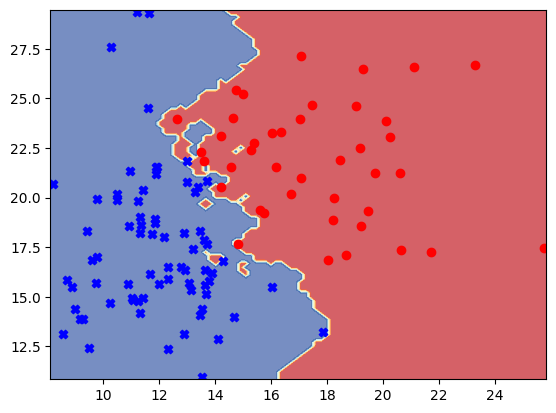

In [12]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

M = np.where(knn_y_pred == 'M')
B = np.where(knn_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting dmc decision surface

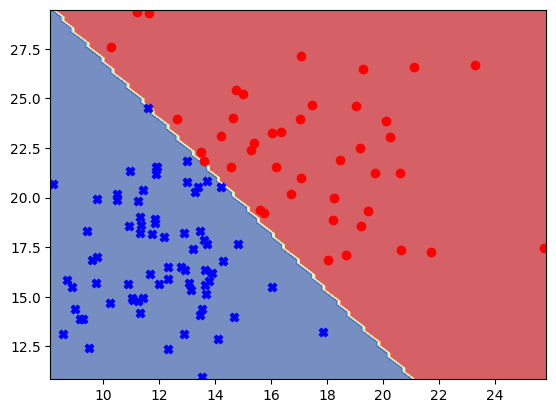

In [13]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

M = np.where(dmc_y_pred == 'M')
B = np.where(dmc_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting naive bayes decision surface

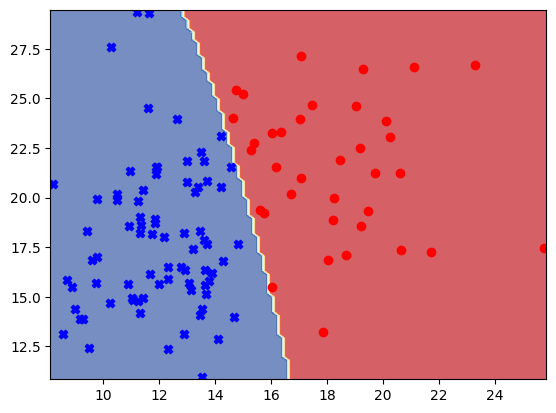

In [14]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[nb_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

nb_y_pred = np.array([nb_model.predict(x) for x in X_test_2d.values])

M = np.where(nb_y_pred == 'M')
B = np.where(nb_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()